# Evolution of the COVID-19 pandemic. A comparative analysis between Romania and the Netherlands

The European Centre for Disease Prevention and Control (ECDC) is an EU agency that aims to strengthen Europe's defences against infectious diseases. In order to achieve this mission, ECDC works in partnership with national health protection bodies across Europe to strengthen and develop continent-wide disease surveillance and early warning systems. By working with experts throughout Europe, ECDC pools Europe's health knowledge, so as to develop authoritative scientific opinions about the risks posed by current and emerging infectious diseases.

Since the beginning of the coronavirus pandemic, ECDC has collected various data statistics on COVID-19, based on reports from health authorities worldwide. This comprehensive and systematic process was carried out on a daily basis until 14/12/2020. From this date and up until 11 March 2021 the approach was shifted to a weekly approach, and afterwards went back to a daily reporting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# Data URL
url_deaths_cases_daily = "https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/csv/data.csv"
url_deaths_cases_weekly = "https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv"
url_testing_weekly = "https://opendata.ecdc.europa.eu/covid19/testing/csv"
url_vaccination_weekly = "https://opendata.ecdc.europa.eu/covid19/vaccine_tracker/csv/data.csv"

In [3]:
#Load daily cases
deaths_cases_daily = pd.read_csv(url_deaths_cases_daily)
deaths_cases_daily['dateRep'] = pd.to_datetime(deaths_cases_daily['dateRep']).dt.strftime('%d-%m-%Y')
deaths_cases_daily.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,15-05-2021,15,5,2021,721,14,Austria,AT,AUT,8901064,Europe
1,14-05-2021,14,5,2021,1100,11,Austria,AT,AUT,8901064,Europe
2,13-05-2021,13,5,2021,1179,14,Austria,AT,AUT,8901064,Europe
3,05-12-2021,12,5,2021,968,19,Austria,AT,AUT,8901064,Europe
4,05-11-2021,11,5,2021,670,16,Austria,AT,AUT,8901064,Europe


In [4]:
#Generate single country dataframe
def country_df(dataframe, country, country_field_name, ascending_sort):
    df = dataframe[dataframe[country_field_name]==country].copy()
    df.reset_index(drop=True, inplace= True)
    df.sort_index(ascending=ascending_sort, inplace=True)
    df.reset_index(drop=True, inplace= True)
    df.drop(index=df.index[0], axis=0, inplace=True)
    return df

Romania_daily = country_df(dataframe=deaths_cases_daily,
                           country='Romania',
                           country_field_name="countriesAndTerritories",
                           ascending_sort=False)

Netherlands_daily = country_df(dataframe=deaths_cases_daily,
                               country='Netherlands',
                               country_field_name="countriesAndTerritories",
                               ascending_sort=False)

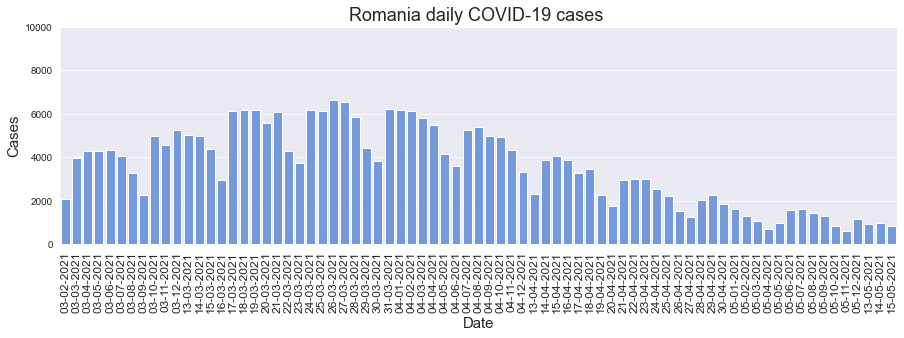

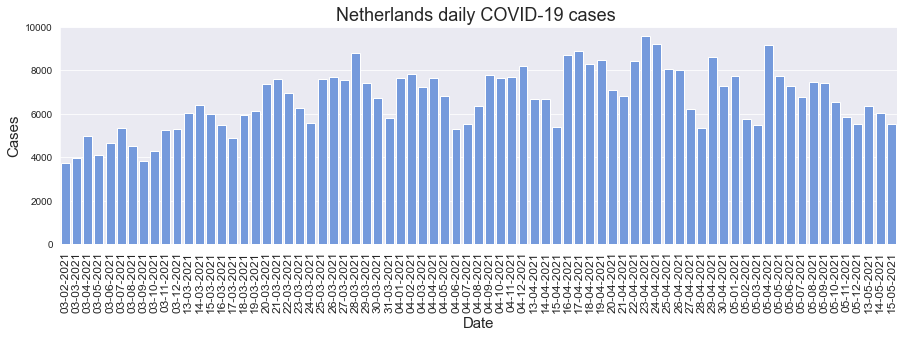

In [5]:
#Plot cases
def plot_cases(df, x, y, country_field_name, ylim, title):
    plt.figure(figsize=(15,4))
    sns.barplot(x=x,y=y, data=df, color="cornflowerblue")
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Cases', fontsize=15)
    plt.ylim(ylim)
    plt.xticks(fontsize=12, rotation=90)
    plt.title("{} ".format(df[country_field_name].iloc[0] + title),fontsize=18)
    plt.show()
    
#Date is in US format (i.e. MM/DD/YYYY)
plot_cases(df=Romania_daily,
           x='dateRep',
           y='cases',
           country_field_name="countriesAndTerritories",
           ylim=(0, 10000),
           title=' daily COVID-19 cases')

plot_cases(Netherlands_daily,
           x='dateRep',
           y='cases',
           country_field_name="countriesAndTerritories",
           ylim=(0, 10000),
           title=' daily COVID-19 cases')

In [6]:
#Load weekly cases
deaths_cases_weekly = pd.read_csv(url_deaths_cases_weekly)
weekly_cases = deaths_cases_weekly[deaths_cases_weekly['indicator']=='cases']

In [7]:
#Create a list with European countries
EuropeCountries = list(set(weekly_cases['country'][weekly_cases['continent']=='Europe']))
EuropeCountries = [c for c in EuropeCountries if '(total)' not in c] #exclude totals

In [8]:
LastWeekCases = pd.DataFrame(columns=weekly_cases.columns)

for c in EuropeCountries:
    country = weekly_cases[weekly_cases['country']==c].iloc[-1,:].to_frame(0).T
    LastWeekCases = pd.concat([LastWeekCases,country],ignore_index=True)

LastWeekCases.sort_values(by='rate_14_day', ascending=False, ignore_index=True, inplace=True)

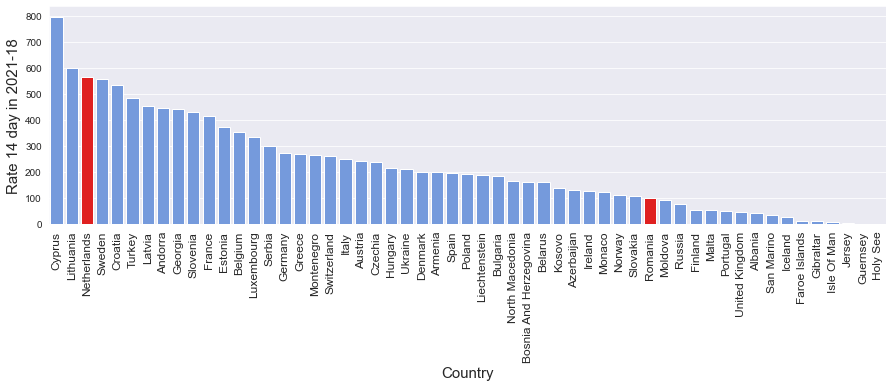

In [9]:
plt.figure(figsize=(15,4))
sns.barplot(x='country',y='rate_14_day', data=LastWeekCases,
            palette=["r" if c in ['Romania', 'Netherlands'] else "cornflowerblue" for c in LastWeekCases['country']])
plt.xlabel('Country', fontsize=15)
plt.ylabel('Rate 14 day in {}'.format(LastWeekCases['year_week'].iloc[0]), fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.show()

The "rate_14_day" indicator is the cummulative number of COVID-19 cases per 100000 inhabitants reported in the last 14 days. It is the main indicator that the EU is using to assess the epidemiological risk across countries in a comparable maner.

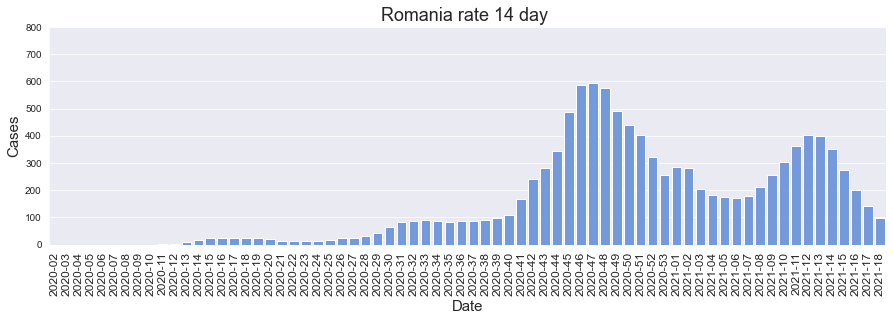

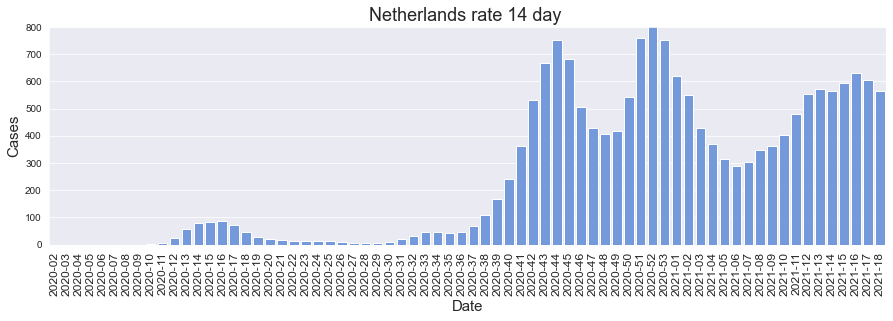

In [10]:
#Generate country data and plot rate 14 day
Romania_weekly = country_df(dataframe=weekly_cases,
                            country='Romania',
                            country_field_name="country",
                            ascending_sort=True)

Netherlands_weekly = country_df(dataframe=weekly_cases,
                                country='Netherlands',
                                country_field_name="country",
                                ascending_sort=True)

plot_cases(df=Romania_weekly,
           x='year_week',
           y='rate_14_day',
           country_field_name="country",
           ylim=(0, 800),
           title=' rate 14 day')

plot_cases(df=Netherlands_weekly,
           x='year_week',
           y='rate_14_day',
           country_field_name="country",
           ylim=(0, 800),
           title=' rate 14 day')

In [11]:
#Load weekly testing
testing_weekly = pd.read_csv(url_testing_weekly)

In [12]:
LastWeekTesting = pd.DataFrame(columns=testing_weekly.columns)

for c in list(testing_weekly['country'].unique()):
    country = testing_weekly[testing_weekly['country']==c].iloc[-1,:].to_frame(0).T
    LastWeekTesting = pd.concat([LastWeekTesting,country],ignore_index=True)

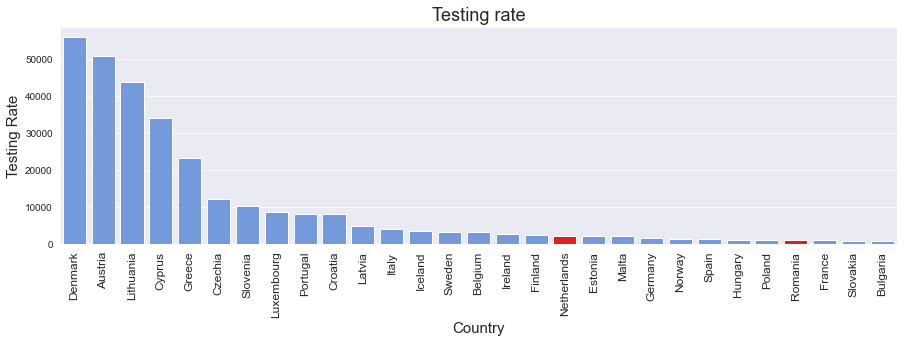

In [22]:
LastWeekTesting.sort_values(by='testing_rate', ascending=False, ignore_index=True, inplace=True)
plt.figure(figsize=(15,4))
sns.barplot(x='country',y='testing_rate', data=LastWeekTesting,
           palette=["r" if c in ['Romania', 'Netherlands'] else "cornflowerblue" for c in LastWeekTesting['country']])
plt.xlabel('Country', fontsize=15)
plt.ylabel('Testing Rate', fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.title('Testing rate', fontsize=18)
plt.show()

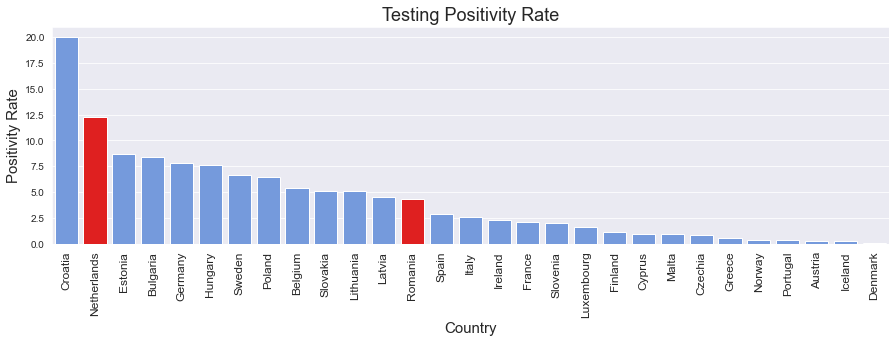

In [23]:
LastWeekTesting.sort_values(by='positivity_rate', ascending=False, ignore_index=True, inplace=True)
plt.figure(figsize=(15,4))
sns.barplot(x='country',y='positivity_rate', data=LastWeekTesting,
           palette=["r" if c in ['Romania', 'Netherlands'] else "cornflowerblue" for c in LastWeekTesting['country']])
plt.xlabel('Country', fontsize=15)
plt.ylabel('Positivity Rate', fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.title('Testing Positivity Rate', fontsize=18)
plt.show()

In [15]:
vaccination_weekly=pd.read_csv(url_vaccination_weekly)
vaccination_weekly['TotalDoses']=vaccination_weekly['FirstDose'] + vaccination_weekly['SecondDose']

In [16]:
RO_NL_vaccination = vaccination_weekly[(vaccination_weekly['ReportingCountry'].isin(['RO','NL'])) & (vaccination_weekly['TargetGroup']=='ALL')]
RO_NL_vaccination_group=RO_NL_vaccination[['Region','Population','NumberDosesReceived','FirstDose','SecondDose','TotalDoses']].groupby(['Population','Region']).sum()
RO_NL_vaccination_group.reset_index(level=0,inplace=True)
RO_NL_vaccination_group['NumberDosesReceived'] = RO_NL_vaccination_group['NumberDosesReceived'].astype('int64')
RO_NL_vaccination_group['FirstDosePer100k'] = (RO_NL_vaccination_group['FirstDose'] / RO_NL_vaccination_group['Population']) * 100000
RO_NL_vaccination_group['SecondDosePer100k'] = (RO_NL_vaccination_group['SecondDose'] / RO_NL_vaccination_group['Population']) * 100000
RO_NL_vaccination_group['TotalDosePer100k'] = (RO_NL_vaccination_group['TotalDoses'] / RO_NL_vaccination_group['Population']) * 100000

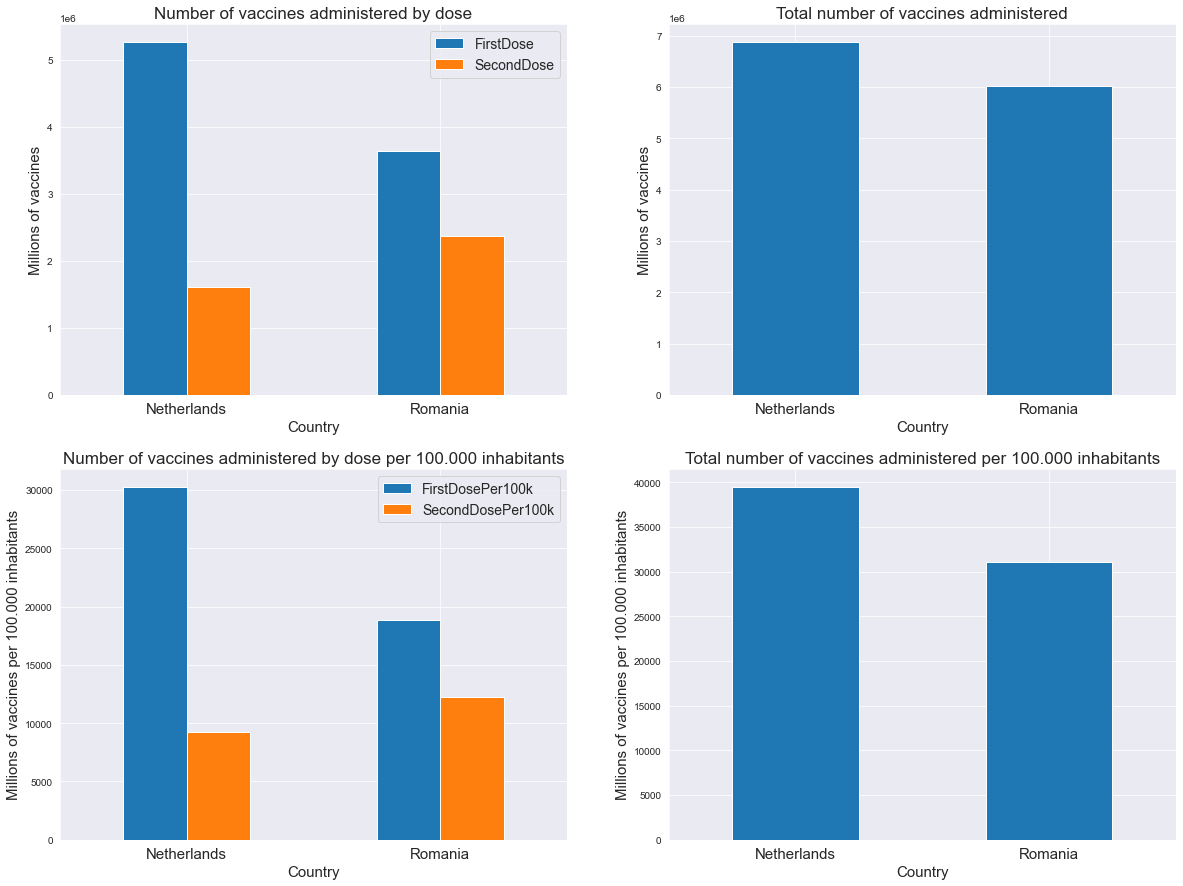

In [17]:
fig,ax=plt.subplots(2,2, figsize=(20,15))
RO_NL_vaccination_group[['FirstDose','SecondDose']].plot.bar(ax=ax[0,0])
RO_NL_vaccination_group[['TotalDoses']].plot.bar(ax=ax[0,1])
RO_NL_vaccination_group[['FirstDosePer100k','SecondDosePer100k']].plot.bar(ax=ax[1,0])
RO_NL_vaccination_group[['TotalDosePer100k']].plot.bar(ax=ax[1,1])

ax[0,0].set_xlabel('Country', fontsize=15)
ax[0,0].set_ylabel('Millions of vaccines', fontsize=15)
ax[0,0].set_xticks(np.arange(2))
ax[0,0].set_xticklabels(['Netherlands','Romania'],rotation=0, fontsize=15)
ax[0,0].set_title('Number of vaccines administered by dose', fontsize=17)
ax[0,0].legend(fontsize=14)

ax[0,1].set_xlabel('Country', fontsize=15)
ax[0,1].set_ylabel('Millions of vaccines', fontsize=15)
ax[0,1].set_xticks(np.arange(2))
ax[0,1].set_xticklabels(['Netherlands','Romania'],rotation=0, fontsize=15)
ax[0,1].set_title('Total number of vaccines administered', fontsize=17)
ax[0,1].legend().set_visible(False)

ax[1,0].set_xlabel('Country', fontsize=15)
ax[1,0].set_ylabel('Millions of vaccines per 100.000 inhabitants', fontsize=15)
ax[1,0].set_xticks(np.arange(2))
ax[1,0].set_xticklabels(['Netherlands','Romania'],rotation=0, fontsize=15)
ax[1,0].set_title('Number of vaccines administered by dose per 100.000 inhabitants', fontsize=17)
ax[1,0].legend(fontsize=14)

ax[1,1].set_xlabel('Country', fontsize=15)
ax[1,1].set_ylabel('Millions of vaccines per 100.000 inhabitants', fontsize=15)
ax[1,1].set_xticks(np.arange(2))
ax[1,1].set_xticklabels(['Netherlands','Romania'],rotation=0, fontsize=15)
ax[1,1].set_title('Total number of vaccines administered per 100.000 inhabitants', fontsize=17)
ax[1,1].legend().set_visible(False)
plt.show()

In [18]:
RO_NL_vaccination = vaccination_weekly[(vaccination_weekly['ReportingCountry'].isin(['RO','NL'])) & (vaccination_weekly['TargetGroup']=='ALL')]
RO_NL_vaccination_weekly=RO_NL_vaccination[['Region','YearWeekISO','NumberDosesReceived','FirstDose','SecondDose','TotalDoses']].groupby(['YearWeekISO','Region']).sum()
RO_NL_vaccination_weekly.reset_index(inplace=True)

In [19]:
def plot_vaccination(df):
    plt.figure(figsize=(15,4))
    sns.barplot(x='YearWeekISO',y='TotalDoses', data=df, color="cornflowerblue")
    plt.xlabel('YearWeekISO', fontsize=15)
    plt.ylabel('Number of vaccines', fontsize=15)
    plt.xticks(fontsize=12, rotation=70)
    plt.title("{} number of vaccines administred".format(df['Region'].iloc[0]),fontsize=18)
    plt.show()

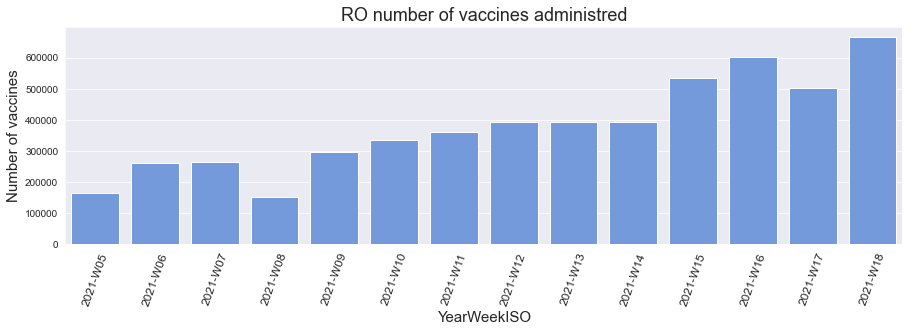

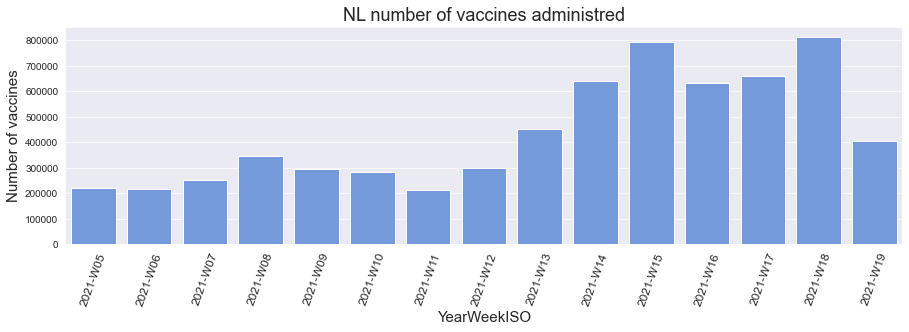

In [20]:
plot_vaccination(RO_NL_vaccination_weekly[RO_NL_vaccination_weekly['Region']=='RO'].iloc[1:,:])
plot_vaccination(RO_NL_vaccination_weekly[RO_NL_vaccination_weekly['Region']=='NL'].iloc[6:,:])